# colab setup

In [ ]:
import os
import sys

# Check if running in Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Colab setup
    !cd /content
    !rm -rf GabonTreeProject
    !git clone https://github.com/runedeclercq/GabonTreeProject.git
    %cd GabonTreeProject
    !pip install -r requirements_colab.txt
else:
    # Local setup (optional: activate virtualenv manually before running)
    print("Running locally. Make sure your virtual environment is activated.")
    os.chdir(os.path.dirname(os.path.abspath("")))


# Bush 2020 paper: data

Coded in R (code available through paper), final datasets downloaded as csv.

In [1]:
# delete all variables
# %reset -f

### load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import decid_package.my_functions as decid
import seaborn as sns
import string
import decid_package.my_plotfunctions as plotf


sns.set_style("white")  # or "white", etc.
from matplotlib import rcParams

rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 14,    # slightly larger
    'xtick.labelsize': 12,   # easier to read
    'ytick.labelsize': 12,
    'legend.fontsize': 14
})


In [3]:
#import all csv files in data/climate_data_Bosh2020

# Set path to your CSV files
path = "../Bush_climate_R_scripts/processed_data/"

# Load each dataset
Rainfall_DOY = pd.read_csv(f"{path}Rainfall_DOY.csv", parse_dates=["Dayof2019"])
Temperature_DOY = pd.read_csv(f"{path}Temperature_DOY.csv", parse_dates=["Dayof2019"])
Humidity_DOY = pd.read_csv(f"{path}Humidity_DOY.csv", parse_dates=["Dayof2019"])
Solar_DOY = pd.read_csv(f"{path}Solar_DOY.csv", parse_dates=["Dayof2019"])
Wind_DOY = pd.read_csv(f"{path}Wind_DOY.csv", parse_dates=["Dayof2019"])
Aerosol_DOY = pd.read_csv(f"{path}Aerosol_DOY.csv", parse_dates=["Dayof2019"])

# # Display the first few rows
print(Rainfall_DOY.head())
# print(Rainfall_DOY.dtypes)
# print(Rainfall_DOY.columns)

   Month  DOY  MeanRain_mm  MeanRain_10day_mm  Dayof2019  MeanRain_month_mm  \
0    1.0    1     0.414706           2.344771 2025-01-01           2.586684   
1    1.0    2     3.788235           2.505602 2025-01-02           2.586684   
2    1.0    3     4.341176           2.498836 2025-01-03           2.586684   
3    1.0    4     2.229412           2.477397 2025-01-04           2.586684   
4    1.0    5     1.000980           2.457892 2025-01-05           2.586684   

  month_labels  
0            J  
1            J  
2            J  
3            J  
4            J  


### plots

#### rainfall

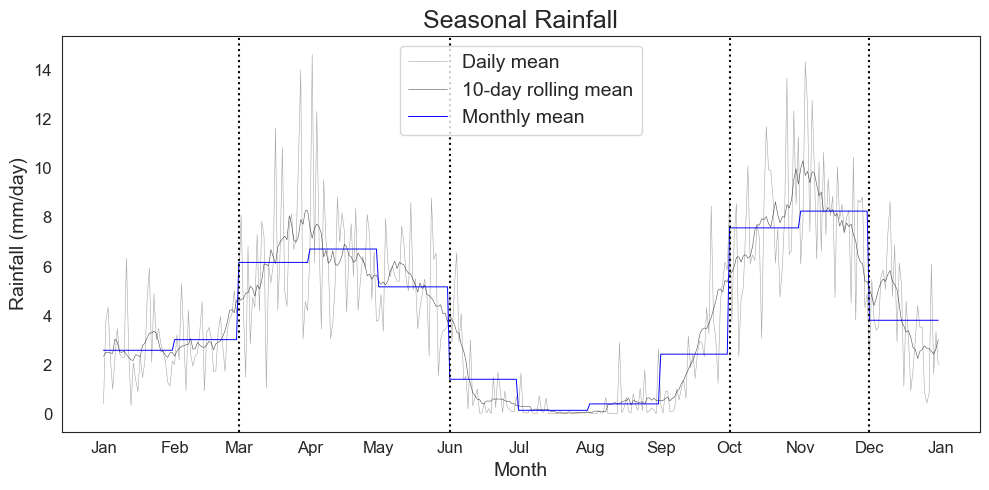

In [4]:
Rainfall_DOY = Rainfall_DOY.sort_values('Dayof2019')

fig, ax = plt.subplots(figsize=(10,5))

# Plot rainfall data
ax.plot(Rainfall_DOY['Dayof2019'], Rainfall_DOY['MeanRain_mm'], 
        color='gray', alpha=0.7, linewidth=0.4, label='Daily mean')

ax.plot(Rainfall_DOY['Dayof2019'], Rainfall_DOY['MeanRain_10day_mm'], 
        color='black', alpha=0.7, linewidth=0.4, label='10-day rolling mean')

ax.plot(Rainfall_DOY['Dayof2019'], Rainfall_DOY['MeanRain_month_mm'], 
        color='blue', alpha=1, linewidth=0.7, label='Monthly mean')

# Add vertical dotted lines
for date in ['2025-03-01', '2025-06-01', '2025-10-01', '2025-12-01']:
    ax.axvline(pd.to_datetime(date), linestyle='dotted', color='black')

import matplotlib.dates as mdates


# Ensure your 'Dayof2019' is datetime
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Jan, Feb, etc.

ax.set_xlabel('Month')
ax.set_ylabel('Rainfall (mm/day)')
ax.set_title('Seasonal Rainfall')
ax.grid(False)
ax.legend()
plt.tight_layout()
plt.show()

#### temperature

C:\Users\decle\AppData\Local\Temp\ipykernel_24336\2719844298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_forest_DOY['month_labels'] = Temp_forest_DOY['Dayof2019'].dt.strftime('%b').str[0]


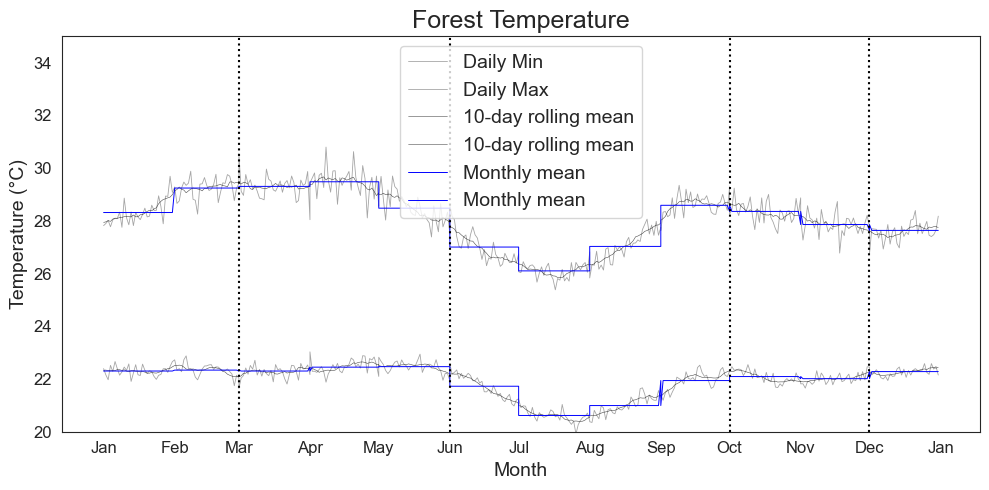

In [5]:
Temperature_DOY = Temperature_DOY.sort_values('Dayof2019')

Temp_forest_DOY = Temperature_DOY[Temperature_DOY['Site'] == 'Forest']
Temp_forest_DOY['month_labels'] = Temp_forest_DOY['Dayof2019'].dt.strftime('%b').str[0]


# Split into two DataFrames
Temp_min = Temp_forest_DOY[Temp_forest_DOY['Type'] == 'Min']
Temp_max = Temp_forest_DOY[Temp_forest_DOY['Type'] == 'Max']

fig, ax = plt.subplots(figsize=(10,5))

# Plot daily min and max temperatures
ax.plot(Temp_min['Dayof2019'], Temp_min['Temperature_c'], color='grey', alpha=0.7, linewidth=0.6, label='Daily Min')
ax.plot(Temp_max['Dayof2019'], Temp_max['Temperature_c'], color='grey', alpha=0.7, linewidth=0.6, label='Daily Max')

# Plot 10-day rolling mean and monthly mean
ax.plot(Temp_min['Dayof2019'], Temp_min['Temperature_c_10days'], color='black', alpha=0.7, linewidth=0.4, label='10-day rolling mean')
ax.plot(Temp_max['Dayof2019'], Temp_max['Temperature_c_10days'], color='black', alpha=0.7, linewidth=0.4, label='10-day rolling mean')

ax.plot(Temp_min['Dayof2019'], Temp_min['Temperature_c_month'], color='blue', alpha=1, linewidth=0.7, label='Monthly mean')
ax.plot(Temp_max['Dayof2019'], Temp_max['Temperature_c_month'], color='blue', alpha=1, linewidth=0.7, label='Monthly mean')

# Seasonal vertical lines
for date in ['2025-03-01', '2025-06-01', '2025-10-01', '2025-12-01']:
    ax.axvline(pd.to_datetime(date), linestyle='dotted', color='black')

# X-axis labels
import matplotlib.dates as mdates


# Ensure your 'Dayof2019' is datetime
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Jan, Feb, etc.
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Forest Temperature')
ax.set_ylim(20, 35)
ax.grid(False)
ax.legend()


plt.tight_layout()
plt.show()


#### humidity

C:\Users\decle\AppData\Local\Temp\ipykernel_24336\3690189248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_forest['month_labels'] = Humidity_forest['Dayof2019'].dt.strftime('%b').str[0]


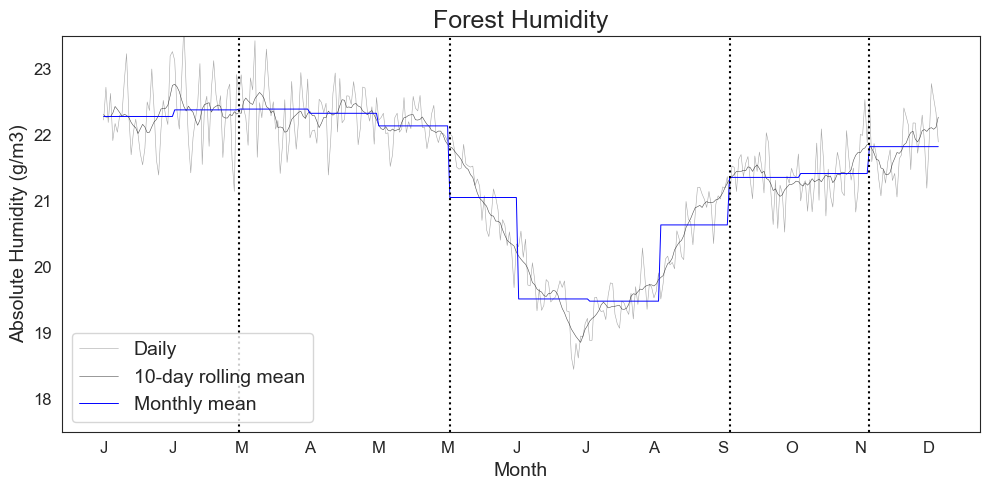

In [6]:
Humidity_DOY = Humidity_DOY.sort_values('Dayof2019')

# Filter for Forest site
Humidity_forest = Humidity_DOY[Humidity_DOY['Site'] == 'Forest']
Humidity_forest['month_labels'] = Humidity_forest['Dayof2019'].dt.strftime('%b').str[0]


fig, ax = plt.subplots(figsize=(10,5))

# Plot humidity data
ax.plot(Humidity_forest['Dayof2019'], Humidity_forest['AbsoluteHumidity_gm3'], 
        color='gray', alpha=0.7, linewidth=0.4, label='Daily')

ax.plot(Humidity_forest['Dayof2019'], Humidity_forest['AbsoluteHumidity_gm3_10days'], 
        color='black', alpha=0.7, linewidth=0.4, label='10-day rolling mean')

ax.plot(Humidity_forest['Dayof2019'], Humidity_forest['AbsoluteHumidity_gm3_month'], 
        color='blue', alpha=1, linewidth=0.7, label='Monthly mean')

# Add vertical dotted lines for seasonal months
for date in ['2025-03-01', '2025-06-01', '2025-10-01', '2025-12-01']:
    ax.axvline(pd.to_datetime(date), linestyle='dotted', color='black')

# Replace x-axis labels with month letters
ax.set_xticks(Humidity_forest['Dayof2019'][::30])  # roughly one tick per month
ax.set_xticklabels(Humidity_forest['month_labels'][::30])

ax.set_xlabel('Month')
ax.set_ylabel('Absolute Humidity (g/m3)')
ax.set_title('Forest Humidity')
ax.set_ylim(17.5, 23.5)
ax.grid(False)
ax.legend()

# Add label
plt.tight_layout()
plt.show()


#### solar

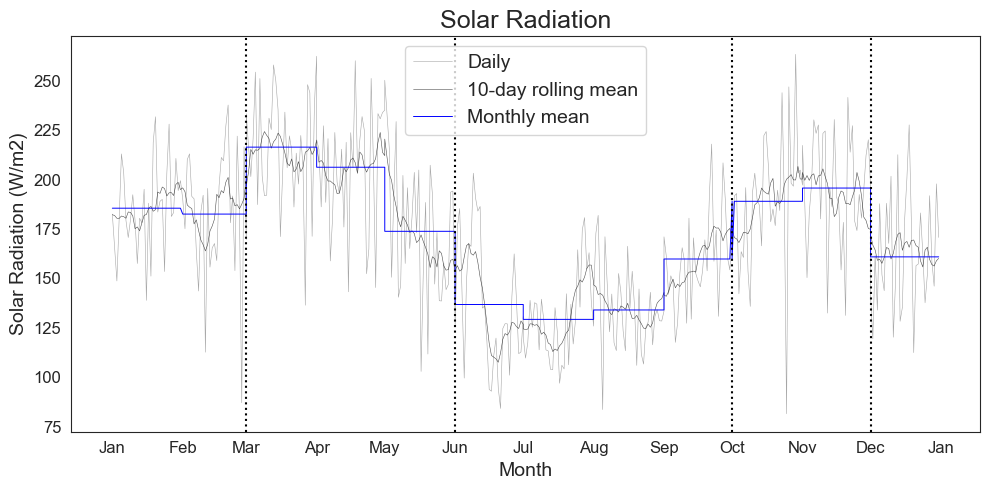

In [7]:
Solar_DOY = Solar_DOY.sort_values('Dayof2019')

Solar_DOY['month_labels'] = Solar_DOY['Dayof2019'].dt.strftime('%b').str[0]


fig, ax = plt.subplots(figsize=(10,5))

# Plot humidity data
ax.plot(Solar_DOY['Dayof2019'], Solar_DOY['Solar_Wm2'], 
        color='gray', alpha=0.7, linewidth=0.4, label='Daily')

ax.plot(Solar_DOY['Dayof2019'], Solar_DOY['Solar_Wm2_10days'], 
        color='black', alpha=0.7, linewidth=0.4, label='10-day rolling mean')

ax.plot(Solar_DOY['Dayof2019'], Solar_DOY['Solar_Wm2_month'], 
        color='blue', alpha=1, linewidth=0.7, label='Monthly mean')

# Add vertical dotted lines for seasonal months
for date in ['2025-03-01', '2025-06-01', '2025-10-01', '2025-12-01']:
    ax.axvline(pd.to_datetime(date), linestyle='dotted', color='black')

import matplotlib.dates as mdates


# Ensure your 'Dayof2019' is datetime
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Jan, Feb, etc.

ax.set_xlabel('Month')
ax.set_ylabel('Solar Radiation (W/m2)')
ax.set_title('Solar Radiation')
ax.grid(False)
ax.legend()

# Add label
plt.tight_layout()
plt.show()


#### wind

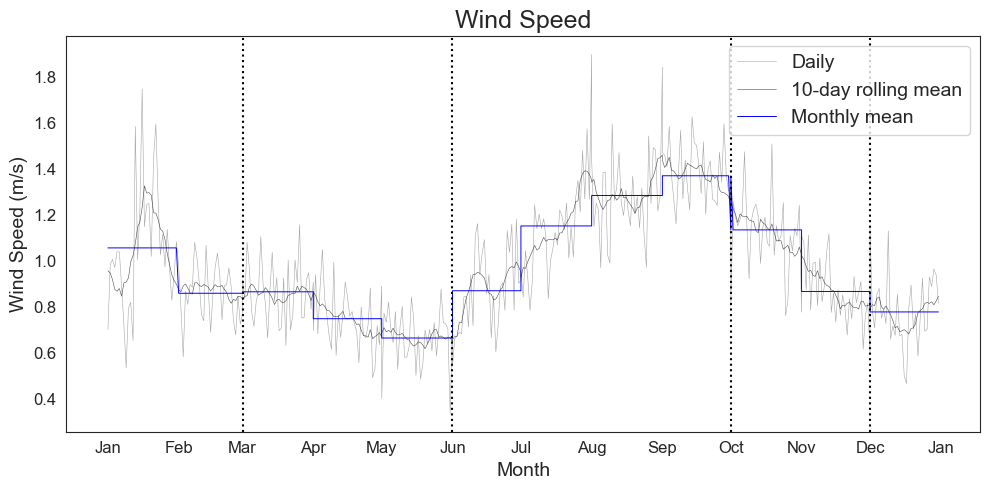

In [8]:
Wind_DOY = Wind_DOY.sort_values('Dayof2019')

# Create month labels (first letter of month)
Wind_DOY['month_labels'] = Wind_DOY['Dayof2019'].dt.strftime('%b').str[0]

fig, ax = plt.subplots(figsize=(10,5))

# Plot wind data
ax.plot(Wind_DOY['Dayof2019'], Wind_DOY['Wind_m_s'], 
        color='gray', alpha=0.7, linewidth=0.4, label='Daily')

ax.plot(Wind_DOY['Dayof2019'], Wind_DOY['Wind_m_s_10days'], 
        color='black', alpha=0.7, linewidth=0.4, label='10-day rolling mean')

ax.plot(Wind_DOY['Dayof2019'], Wind_DOY['Wind_m_s_month'], 
        color='blue', alpha=1, linewidth=0.7, label='Monthly mean')

# Add vertical dotted lines for seasonal months
for date in ['2025-03-01', '2025-06-01', '2025-10-01', '2025-12-01']:
    ax.axvline(pd.to_datetime(date), linestyle='dotted', color='black')

# Set x-axis labels
import matplotlib.dates as mdates


# Ensure your 'Dayof2019' is datetime
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Jan, Feb, etc.

ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Wind Speed')
ax.grid(False)
ax.legend()

plt.tight_layout()
plt.show()


#### aerosol

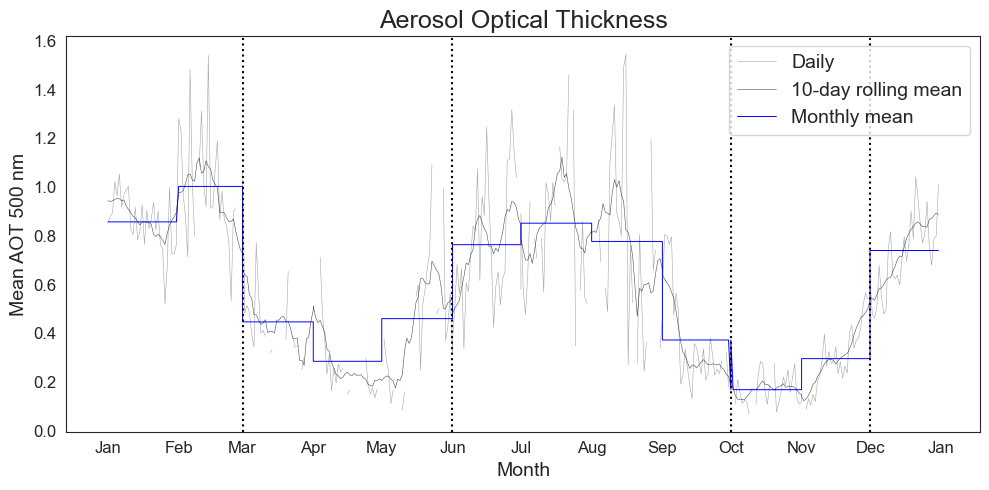

In [9]:
Aerosol_DOY = Aerosol_DOY.sort_values('Dayof2019')

# Create month labels (first letter of month)
Aerosol_DOY['month_labels'] = Aerosol_DOY['Dayof2019'].dt.strftime('%b').str[0]

fig, ax = plt.subplots(figsize=(10,5))

# Plot aerosol data
ax.plot(Aerosol_DOY['Dayof2019'], Aerosol_DOY['MeanAOT_500'], 
        color='gray', alpha=0.7, linewidth=0.4, label='Daily')

ax.plot(Aerosol_DOY['Dayof2019'], Aerosol_DOY['MeanAOT_500_10days'], 
        color='black', alpha=0.7, linewidth=0.4, label='10-day rolling mean')

ax.plot(Aerosol_DOY['Dayof2019'], Aerosol_DOY['MeanAOT_500_month'], 
        color='blue', alpha=1, linewidth=0.7, label='Monthly mean')

# Add vertical dotted lines for seasonal months
for date in ['2025-03-01', '2025-06-01', '2025-10-01', '2025-12-01']:
    ax.axvline(pd.to_datetime(date), linestyle='dotted', color='black')

import matplotlib.dates as mdates


# Ensure your 'Dayof2019' is datetime
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Jan, Feb, etc.

ax.set_xlabel('Month')
ax.set_ylabel('Mean AOT 500 nm')
ax.set_title('Aerosol Optical Thickness')
ax.grid(False)
ax.legend()

plt.tight_layout()
plt.show()


## sensor data

In [10]:
df_trends = pd.read_csv("../outputs/df_all.csv")
df_trends['DateTime'] = pd.to_datetime(df_trends['DateTime'])

df_phenocam = pd.read_csv("../outputs/df_phenocam_period.csv")
df_phenocam['DateTime'] = pd.to_datetime(df_phenocam['DateTime'])

In [11]:
sensor_colors = {
    'TOMST': 'tab:orange',
    'Natkon': 'tab:blue',
    'Sap Flow': 'tab:green'
}

season_colors = {'wet':'deepskyblue', 'dry':'gold'}


In [12]:
colors = plotf.get_color_maps()
sensor_colors = colors['sensor']
phen_colors = colors['phenology']
bloom_colors = colors['bloom']
season_colors = colors['season']


In [13]:
df_trends.columns

Index(['DateTime', 'flat_flag', 'missing', 'gap_block', 'raw_signal',
       'smoothed_signal', 'daily_mean', 'detrended_daily_mean', 'short_trend',
       'detrended_short', 'long_trend', 'detrended_long',
       'short_trend_dday_diff', 'smoothed_signal_roll10d',
       'smoothed_signal_mean_D', 'smoothed_signal_min_D',
       'smoothed_signal_max_D', 'smoothed_signal_mean_W',
       'smoothed_signal_min_W', 'smoothed_signal_max_W',
       'smoothed_signal_mean_M', 'smoothed_signal_min_M',
       'smoothed_signal_max_M', 'Days_since_start', 'Period', 'Day_of_Period',
       'smoothed_signal_pct_global', 'smoothed_signal_pct_period',
       'smoothed_signal_mean_D_pct_global',
       'smoothed_signal_mean_D_pct_period',
       'smoothed_signal_mean_W_pct_global',
       'smoothed_signal_mean_W_pct_period',
       'smoothed_signal_mean_M_pct_global',
       'smoothed_signal_mean_M_pct_period',
       'smoothed_signal_roll10d_pct_global',
       'smoothed_signal_roll10d_pct_period', 'Se

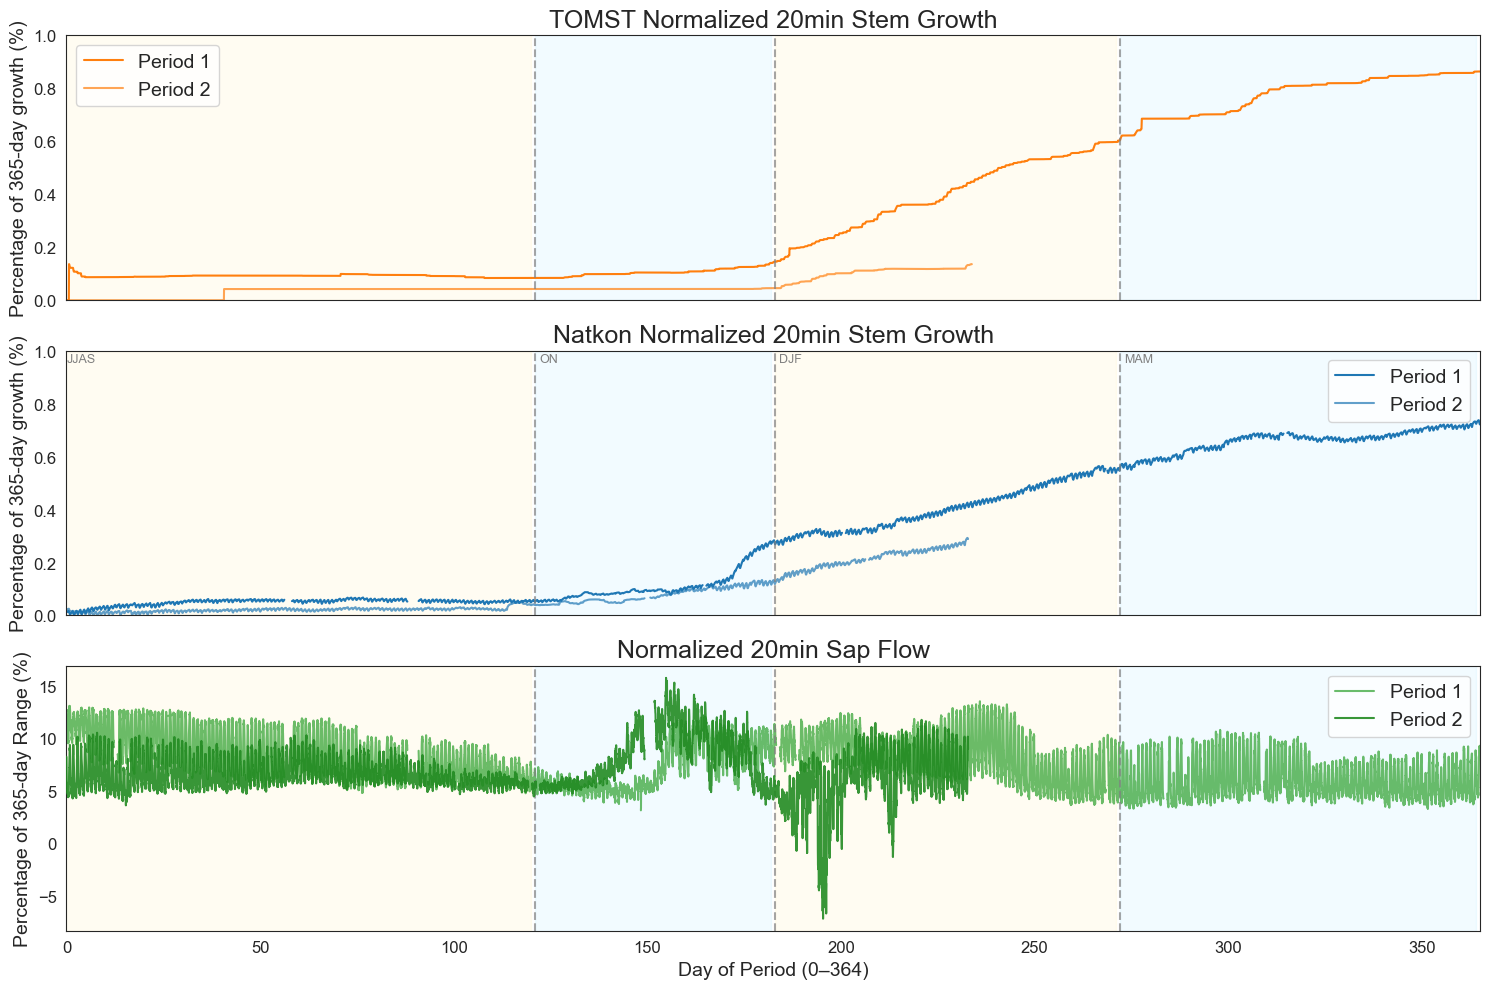

In [14]:
agg_to_plot = '20min'  # choose aggregation level (can also be 'D', 'W', 'M', 'roll10')

# Define seasons (Day-of-Period)
seasons = {
    'JJAS': {'start': -1, 'end': 120, 'type':'dry'},  # June–Sept
    'ON':   {'start': 121, 'end': 182, 'type':'wet'}, # Oct–Nov
    'DJF':  {'start': 183, 'end': 271, 'type':'dry'}, # Dec–Feb
    'MAM':  {'start': 272, 'end': 364, 'type':'wet'}  # Mar–May
}


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,10), sharex=True)


pct_colnames = None
if agg_to_plot == '20min':col_map = {
    'TOMST': 'smoothed_signal',
    'Natkon': 'smoothed_signal',
    'Sap Flow': 'smoothed_signal'
    } 
    
elif agg_to_plot == 'roll10': 
    col_map = {
    'TOMST': 'smoothed_signal_roll10',
    'Natkon': 'smoothed_signal_roll10',
    'Sap Flow': 'smoothed_signal_roll10'  
    }

else:
    col_map = {
    'TOMST': f'smoothed_signal_mean_{agg_to_plot}',
    'Natkon': f'smoothed_signal_mean_{agg_to_plot}',
    'Sap Flow': f'smoothed_signal_flow_mean_{agg_to_plot}'
    }

# --- Top subplot: TOMST ---
sensor = 'TOMST'
subset = df_trends[(df_trends['Sensor']=='TOMST')]
col = col_map[sensor] + '_pct_period'

for period in sorted(subset['Period'].unique()):
        period_subset = subset[subset['Period']==period]
        ax1.plot(period_subset['Day_of_Period'], 
                 period_subset[col], 
                 label=f'Period {period+1}', 
                 alpha=1 if period == 0 else 0.7,
                 color = sensor_colors['TOMST'], linestyle = '-')
        

# Add vertical lines for season changes
for season, info in seasons.items():
    ax1.axvspan(info['start'], info['end'], color=season_colors[info['type']], alpha=0.05, zorder = 0)
    ax1.axvline(x=info['start'], color='gray', linestyle='--', alpha=0.7)
    # ax1.text(info['start']+1, ax1.get_ylim()[1]*0.945, season, 
    #          rotation=0, verticalalignment='top', fontsize=9, color='gray')

ax1.set_xlim(0, 365)
ax1.set_ylim(0, 1)

ax1.set_ylabel('Percentage of 365-day growth (%)')
ax1.set_title(f'TOMST Normalized {agg_to_plot.capitalize()} Stem Growth')
ax1.legend()


# --- Middle subplot: Natkon sensors ---

sensor = 'Natkon'
subset = df_trends[(df_trends['Sensor']==sensor)]
col = col_map[sensor] + '_pct_period'

for period in sorted(subset['Period'].unique()):
        period_subset = subset[subset['Period']==period]
        ax2.plot(period_subset['Day_of_Period'], 
                 period_subset[col], 
                 label=f'Period {period+1}', 
                 alpha=1 if period == 0 else 0.7,
                 color = sensor_colors[sensor], linestyle = '-')
        

# Add vertical lines for season changes
for season, info in seasons.items():
    ax2.axvspan(info['start'], info['end'], color=season_colors[info['type']], alpha=0.05, zorder = 0)
    ax2.axvline(x=info['start'], color='gray', linestyle='--', alpha=0.7)
    ax2.text(info['start']+1, ax1.get_ylim()[1]*0.99, season, 
             rotation=0, verticalalignment='top', fontsize=9, color='gray')

ax2.set_xlim(0, 365)
ax2.set_ylim(0, 1)

ax2.set_ylabel('Percentage of 365-day growth (%)')
ax2.set_title(f'Natkon Normalized {agg_to_plot.capitalize()} Stem Growth')
ax2.legend()


# --- Bottom subplot: sap flow ---
col = col_map['Sap Flow']
subset = df_trends[df_trends['Sensor'] == 'Sap Flow']

for period in sorted(subset['Period'].unique()):
    period_subset = subset[subset['Period']==period]
    ax3.plot(period_subset['Day_of_Period'], 
            period_subset[col], 
            label=f'Period {period+1}', 
            alpha=0.7 if period == 0 else 0.9,
            color=sensor_colors['Sap Flow'] if period == 0 else 'forestgreen', 
            zorder = 2 if period ==0 else 5)

# Add vertical lines for season changes
# Add vertical lines for season changes
for season, info in seasons.items():
    ax3.axvspan(info['start'], info['end'], color=season_colors[info['type']], alpha=0.05, zorder = 0)
    ax3.axvline(x=info['start'], color='gray', linestyle='--', alpha=0.7)
    # ax3.text(info['start']+1, ax1.get_ylim()[1]*1.04, season, 
    #          rotation=0, verticalalignment='top', fontsize=9, color='gray')

ax3.set_xlabel('Day of Period (0–364)')
ax3.set_ylabel('Percentage of 365-day Range (%)')
ax3.set_title(f'Normalized {agg_to_plot.capitalize()} Sap Flow')
ax3.legend()

plt.tight_layout()
plt.show()


## linking climate data and tree data

In [15]:
# If you have daily data, sort by 'month' and 'DOY'
# Create a new column for water year order (June=1, July=2, ..., May=12)
# Load each dataset
import pandas as pd

# Put your datasets in a dictionary
climate_data = {
    'Rainfall': Rainfall_DOY,
    'Temperature': Temperature_DOY,
    'Temp_forest': Temp_forest_DOY,
    'Humidity': Humidity_DOY,
    'Humidity_forest': Humidity_forest,
    'Solar': Solar_DOY,
    'Wind': Wind_DOY,
    'Aerosol': Aerosol_DOY
}

# Compute WaterYearDOY for each dataset
for name, df in climate_data.items():
    df['WaterYearDOY'] = (df['DOY'] - 153) % 365
    climate_data[name] = df.sort_values('WaterYearDOY')



C:\Users\decle\AppData\Local\Temp\ipykernel_24336\1069309066.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WaterYearDOY'] = (df['DOY'] - 153) % 365
C:\Users\decle\AppData\Local\Temp\ipykernel_24336\1069309066.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WaterYearDOY'] = (df['DOY'] - 153) % 365


In [16]:
import matplotlib.dates as mdates

def climate_plot(df, value_cols, title='Climate Data', key_dates=None, colors=None, alphas=None, linewidths=None):
    df = df.copy()

    # --- Ensure datetime exists ---
    if not np.issubdtype(df['Dayof2019'].dtype, np.datetime64):
        raise ValueError("DataFrame must have a datetime column named 'DateTime'")

    # Water Year DOY (June 1 = day 0)
    df['WaterYearDOY'] = (df['DOY'] - 153) % 365
    df_sorted = df.sort_values('WaterYearDOY')

    fig, ax = plt.subplots(figsize=(10,5))

    # Plot each series
    for col, label in value_cols.items():
        ax.plot(
            df_sorted['WaterYearDOY'], 
            df_sorted[col], 
            label=label,
            color=colors.get(col, 'black') if colors else 'black',
            alpha=alphas.get(col, 0.7) if alphas else 0.7,
            linewidth=linewidths.get(col, 0.7) if linewidths else 0.7
        )

    # Vertical dotted lines for key_dates
    if key_dates is not None:
        for d in key_dates:
            doy = pd.to_datetime(d).dayofyear
            wy_doy = (doy - 151) % 365
            ax.axvline(wy_doy, linestyle='dotted', color='black')

    # --- Month ticks automatically ---
    # Get unique months in order (water year starting June)
    months = pd.date_range(df['Dayof2019'].min(), df['Dayof2019'].max(), freq='MS')
    wy_ticks = ((months.dayofyear - 153) % 365)
    month_labels = months.strftime('%b')  # or .str[0] for J F M...

    ax.set_xticks(wy_ticks)
    ax.set_xticklabels(month_labels)

    # Styling
    ax.set_xlabel('Month (Water Year)')
    ax.set_ylabel('Value')
    ax.set_xlim(0, 365)
    ax.set_title(title)
    ax.grid(False)
    ax.legend()
    plt.tight_layout()
    # plt.show()


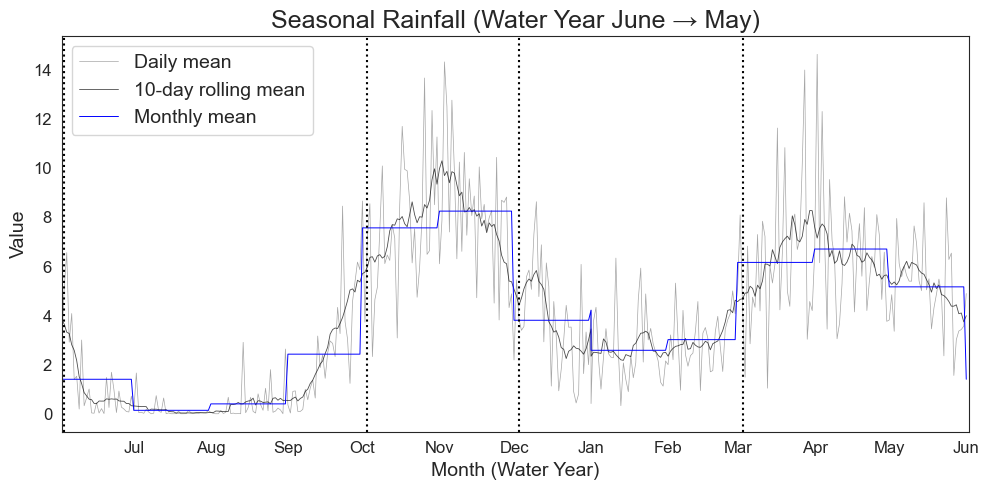

In [17]:

# Example usage for Rainfall
climate_plot(
    Rainfall_DOY,
    value_cols={
        'MeanRain_mm': 'Daily mean',
        'MeanRain_10day_mm': '10-day rolling mean',
        'MeanRain_month_mm': 'Monthly mean'
    },
    title='Seasonal Rainfall (Water Year June → May)',
    key_dates=['2025-06-01','2025-10-01','2025-12-01','2026-03-01'],
    colors={
        'MeanRain_mm':'gray',
        'MeanRain_10day_mm':'black',
        'MeanRain_month_mm':'blue'
    },
    alphas={
        'MeanRain_mm':0.7,
        'MeanRain_10day_mm':0.7,
        'MeanRain_month_mm':1.0
    },
    linewidths={
        'MeanRain_mm':0.5,
        'MeanRain_10day_mm':0.6,
        'MeanRain_month_mm':0.7
    }
)


<class 'dict'> {'JJAS': {'start': -1, 'end': 120, 'type': 'dry'}, 'ON': {'start': 121, 'end': 182, 'type': 'wet'}, 'DJF': {'start': 183, 'end': 271, 'type': 'dry'}, 'MAM': {'start': 272, 'end': 364, 'type': 'wet'}}
<class 'dict'> {'wet': 'deepskyblue', 'dry': 'gold'}


C:\Users\decle\AppData\Local\Temp\ipykernel_24336\730368717.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


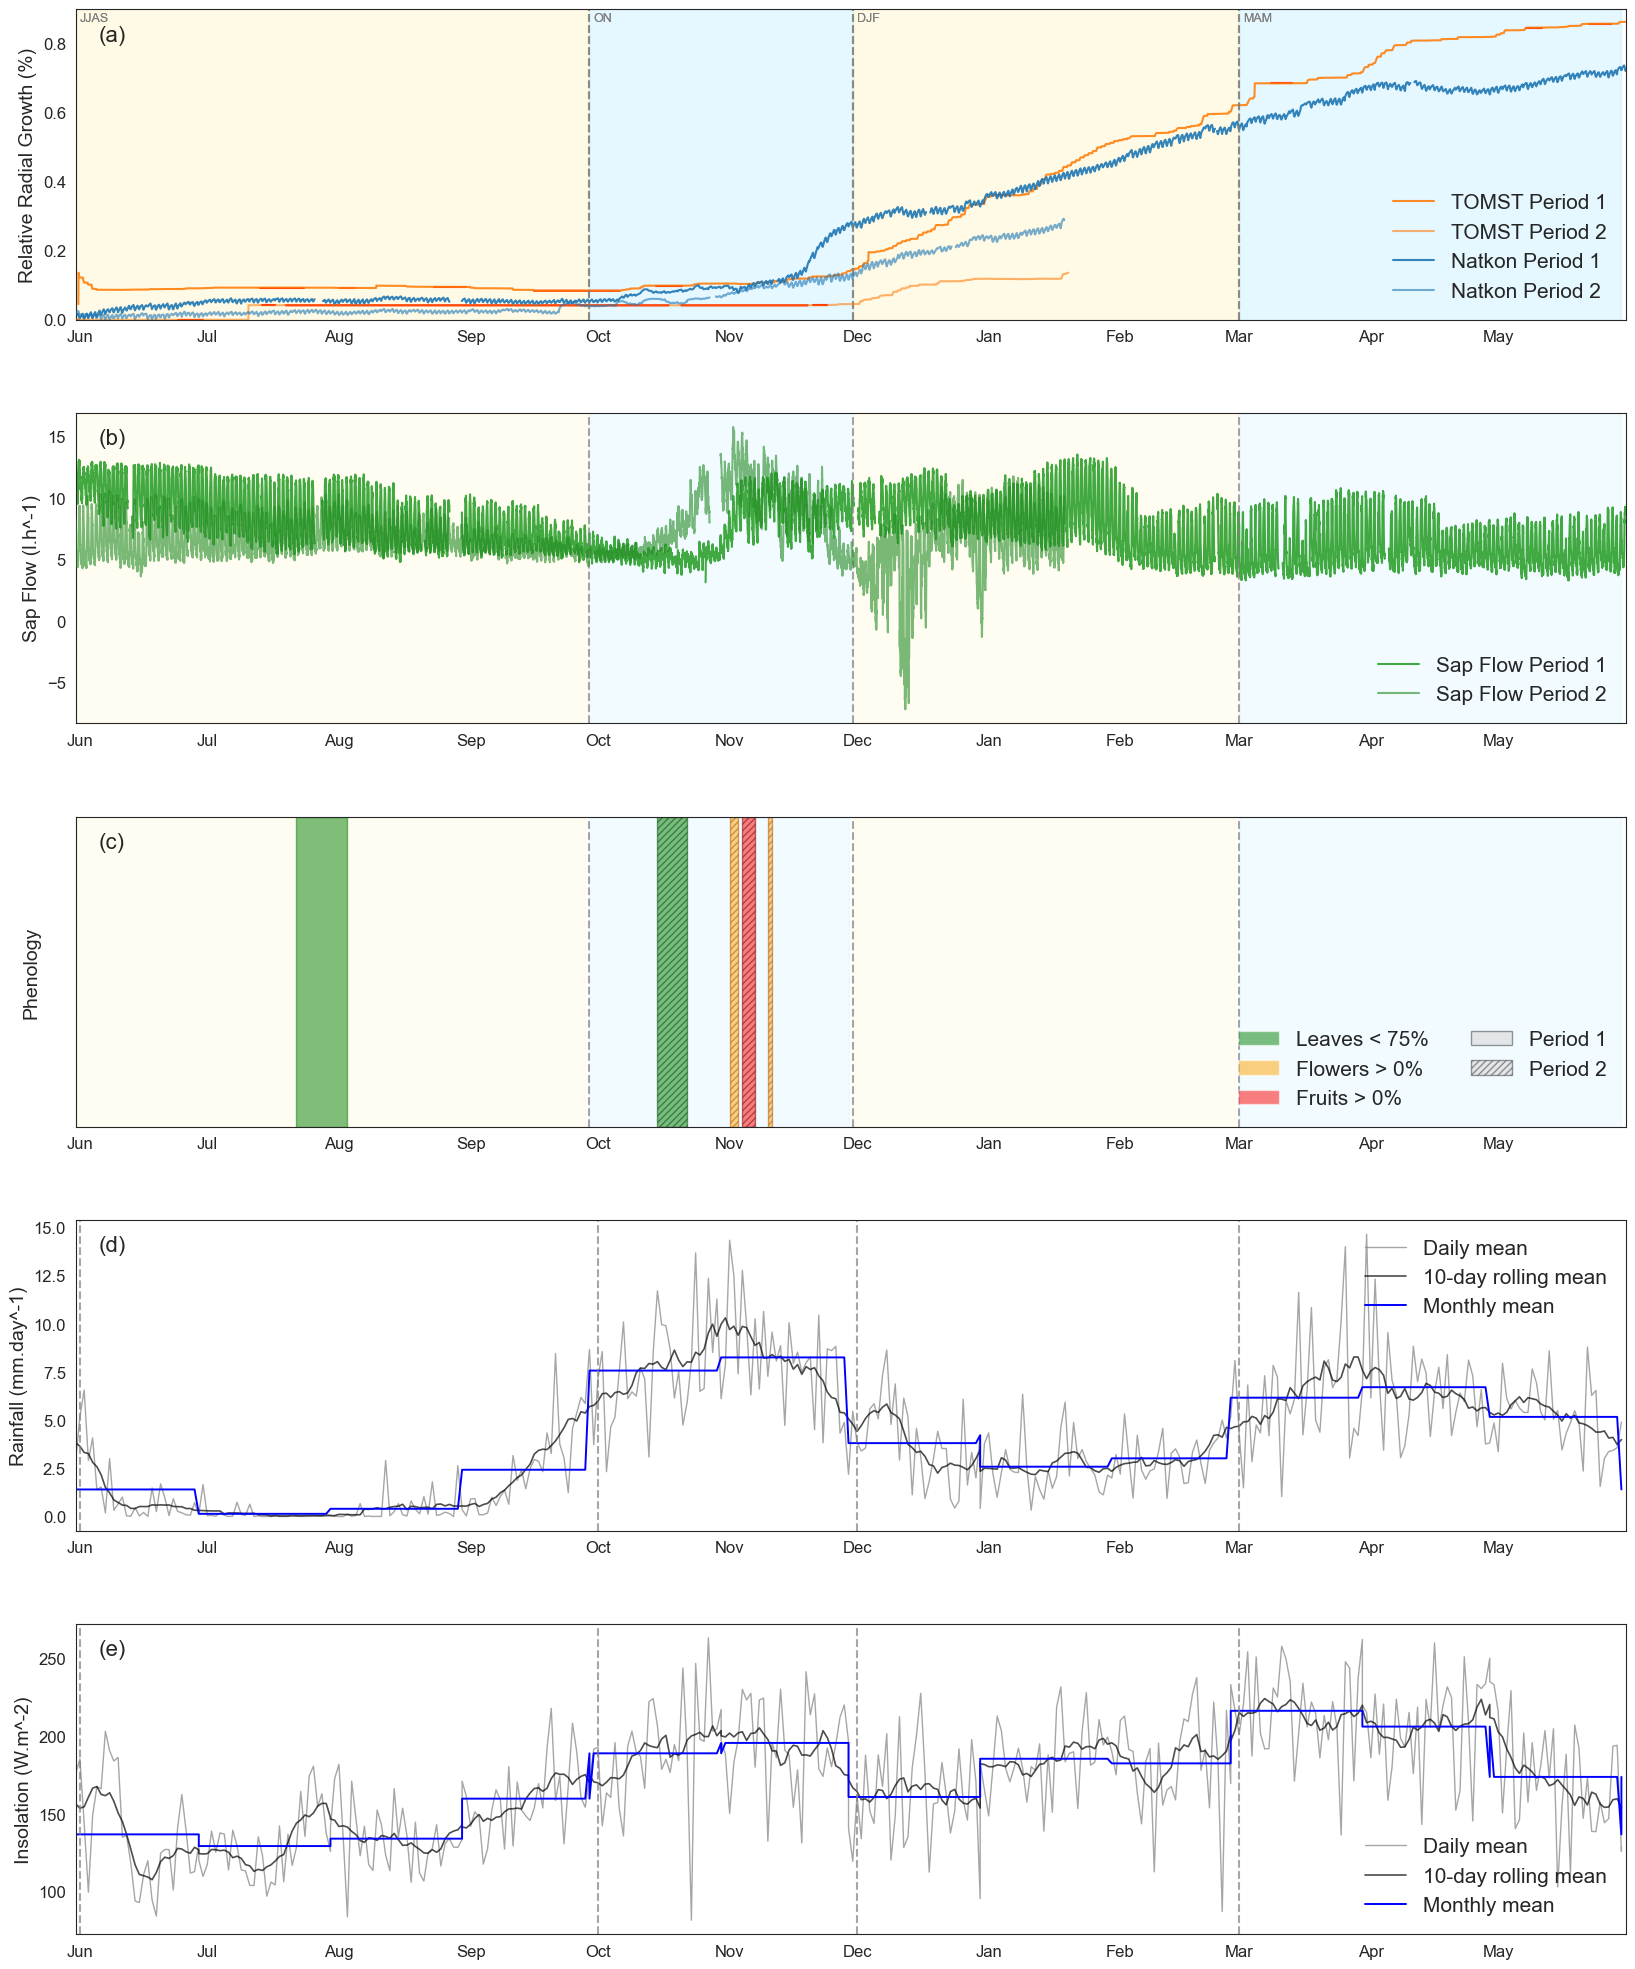

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sensor_colors = plotf.get_color_maps()['sensor']
season_colors = plotf.get_color_maps()['season']

# --- Set up figure with 4 vertical panels ---
fig = plt.figure(figsize=(20, 25))
gs = fig.add_gridspec(5, 1, height_ratios=[1, 1, 1, 1, 1], hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[3, 0], sharex=ax1)
ax5 = fig.add_subplot(gs[4, 0], sharex=ax1)

rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 18,    # slightly larger
    'xtick.labelsize': 13,   # easier to read
    'ytick.labelsize': 13,
    'legend.fontsize': 15
})


agg_to_plot = '20min'


if agg_to_plot == '20min':
    col_map = {s: 'smoothed_signal' for s in ['TOMST', 'Natkon', 'Sap Flow']}
elif agg_to_plot == 'roll10d':
    col_map = {s: 'smoothed_signal_roll10d' for s in ['TOMST', 'Natkon', 'Sap Flow']}
else:
    col_map = {s: f'smoothed_signal_mean_{agg_to_plot}' for s in ['TOMST', 'Natkon', 'Sap Flow']}

print(type(seasons), seasons)
print(type(season_colors), season_colors)


# Dendrometers
for sensor in ['TOMST', 'Natkon']:
    plotf.plot_sensor(df_trends, ax1, sensor, 
                      col_map[sensor] + '_pct_period',
                      'Relative Radial Growth (%)',
                      f'Normalized Stem Diameter [{agg_to_plot} aggregation]', 
                      sensor_colors, season_colors)

ax1.set_xlim(0, 365)
ax1.set_ylim(0, 0.9)

# Sap Flow
plotf.plot_sensor(df_trends, ax2, 'Sap Flow', col_map['Sap Flow'],
                  'Detrended Sap Flow (raw units)',
                  f'Sap Flow [{agg_to_plot} aggregation]', 
                  sensor_colors, season_colors, season_text=False)
ax2.set_ylabel('Sap Flow (l.h^-1)')
# ax2.set_xlabel('Day of Period (0–364)')
ax2.set_xlim(0, 365)

# Event timeline on the third subplot (existing ax3)
# plotf.plot_event_timeline(ax3, timeline_df)

x = df_phenocam['Day_of_Period']

# Masks
mask_leafs   = df_phenocam['%leafs']   < 75
mask_flowers = df_phenocam['%flowers'] > 0
mask_fruits  = df_phenocam['%fruits']  > 0

# Period masks
mask_p0 = df_phenocam['Period'] == 0
mask_p1 = df_phenocam['Period'] == 1

from matplotlib.patches import Patch

# --- Fill areas (no labels here)
ax3.fill_between(x, 0, 1, where=mask_leafs & mask_p0, color='green', alpha=0.5, transform=ax3.get_xaxis_transform())
ax3.fill_between(x, 0, 1, where=mask_leafs & mask_p1, color='green', alpha=0.5, hatch= '/////', edgecolor="#004200", transform=ax3.get_xaxis_transform())

ax3.fill_between(x, 0, 1, where=mask_flowers & mask_p0, color='orange', alpha=0.5, transform=ax3.get_xaxis_transform())
ax3.fill_between(x, 0, 1, where=mask_flowers & mask_p1, color='orange', alpha=0.5, hatch= '/////', edgecolor="#AD4E00", transform=ax3.get_xaxis_transform())

ax3.fill_between(x, 0, 1, where=mask_fruits & mask_p0, color='red', alpha=0.5, transform=ax3.get_xaxis_transform())
ax3.fill_between(x, 0, 1, where=mask_fruits & mask_p1, color='red', alpha=0.5, hatch= '/////', edgecolor="#740000", transform=ax3.get_xaxis_transform())

# --- Custom legend handles
phenology_handles = [
    Patch(facecolor='green', alpha = 0.5, label='Leaves < 75%'),
    Patch(facecolor='orange', alpha = 0.5, label='Flowers > 0%'),
    Patch(facecolor='red', alpha = 0.5, label='Fruits > 0%')
]

period_handles = [
    Patch(facecolor='lightgray', alpha=0.5, edgecolor = "#353535", label='Period 1'),
    Patch(facecolor='lightgray', alpha = 0.5, hatch='/////', edgecolor="#353535", label='Period 2')
]

# --- Combine and show legend
ax3.legend(handles=phenology_handles + period_handles, loc='lower right', ncol=2, frameon=False)
# Cosmetics
ax3.set_ylabel("Phenology", labelpad=25)
# remove y ticks
ax3.get_yaxis().set_ticks([])
ax3.set_xlim(0, 365)
# ax3.set_xlabel("Day of Period (0–364)")


seasons = {'JJAS': {'start': 0, 'end': 120, 'type':'dry'},  # June–Sept
           'ON':   {'start': 121, 'end': 182, 'type':'wet'}, # Oct–Nov
           'DJF':  {'start': 183, 'end': 273, 'type':'dry'}, # Dec–Feb
           'MAM':  {'start': 274, 'end': 364, 'type':'wet'}  # Mar–May
           }

plotf.add_season_shading(seasons, season_colors, ax3, season_text = False)



# --- Panel 4: Climate (e.g., Rainfall) ---

# Climate plotting directly
df_sorted = Rainfall_DOY.sort_values('WaterYearDOY')

for col, label in {
    'MeanRain_mm':'Daily mean',
    'MeanRain_10day_mm':'10-day rolling mean',
    'MeanRain_month_mm':'Monthly mean'
}.items():
    ax4.plot(df_sorted['WaterYearDOY'], df_sorted[col], label=label,
             color={'MeanRain_mm':'gray', 'MeanRain_10day_mm':'black','MeanRain_month_mm':'blue'}[col],
             alpha={ 'MeanRain_mm':0.7,'MeanRain_10day_mm':0.7,'MeanRain_month_mm':1}[col],
             linewidth={ 'MeanRain_mm':1,'MeanRain_10day_mm':1.2,'MeanRain_month_mm':1.4}[col])



ax4.set_xlim(0, 365)
ax4.set_ylabel('Rainfall (mm.day^-1)')
# ax4.set_xlabel('Water Year (June → May)')
# ax4.set_title('Seasonal Rainfall')
ax4.legend(frameon = False, loc = 'upper right')


# --- Panel 5: Climate (Solar)

df_sorted = Solar_DOY.sort_values('WaterYearDOY')

for col, label in {
    'Solar_Wm2':'Daily mean',
    'Solar_Wm2_10days':'10-day rolling mean',
    'Solar_Wm2_month':'Monthly mean'
}.items():
    ax5.plot(df_sorted['WaterYearDOY'], df_sorted[col], label=label,
             color={'Solar_Wm2':'gray', 'Solar_Wm2_10days':'black','Solar_Wm2_month':'blue'}[col],
             alpha={ 'Solar_Wm2':0.7,'Solar_Wm2_10days':0.7,'Solar_Wm2_month':1}[col],
             linewidth={ 'Solar_Wm2':1,'Solar_Wm2_10days':1.2,'Solar_Wm2_month':1.4}[col])
ax5.set_ylabel('Insolation (W.m^-2)')

ax5.legend(frameon = False, loc = 'lower right')



# Month ticks for water year

months = pd.date_range(df_sorted['Dayof2019'].min(), df_sorted['Dayof2019'].max(), freq='MS')
wy_ticks = ((months.dayofyear - 151) % 365)
month_labels = months.strftime('%b')  # or .str[0] for J F M...


for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]): 
    ax.set_xticks(wy_ticks)
    ax.set_xticklabels(month_labels)

    ax.text(0.015, 0.95, f'({string.ascii_lowercase[i]})',
            transform=ax.transAxes,
            fontsize=16, va='top', ha='left')



# Climate vertical lines
for d in ['2025-06-01','2025-10-01','2025-12-01','2026-03-01']:
    doy = pd.to_datetime(d).dayofyear
    wy_doy = (doy - 151) % 365
    # ax4.axvspan(wy_doy, info['end'], color=season_colors[info['type']], alpha=0.05, zorder=0)
    ax4.axvline(wy_doy, color='gray', linestyle='--', alpha=0.7)
    ax5.axvline(wy_doy, color='gray', linestyle='--', alpha=0.7)





plt.tight_layout()
plt.savefig('../outputs/figures/main_period_plot_climate.png', dpi=600, bbox_inches='tight')

plt.show()



rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 14,    # slightly larger
    'xtick.labelsize': 12,   # easier to read
    'ytick.labelsize': 12,
    'legend.fontsize': 14
})


C:\Users\decle\AppData\Local\Temp\ipykernel_24336\2168993832.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sorted_min = df_sorted[Temp_forest_DOY['Type'] == 'Min']
C:\Users\decle\AppData\Local\Temp\ipykernel_24336\2168993832.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sorted_max = df_sorted[Temp_forest_DOY['Type'] == 'Max']
C:\Users\decle\AppData\Local\Temp\ipykernel_24336\2168993832.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


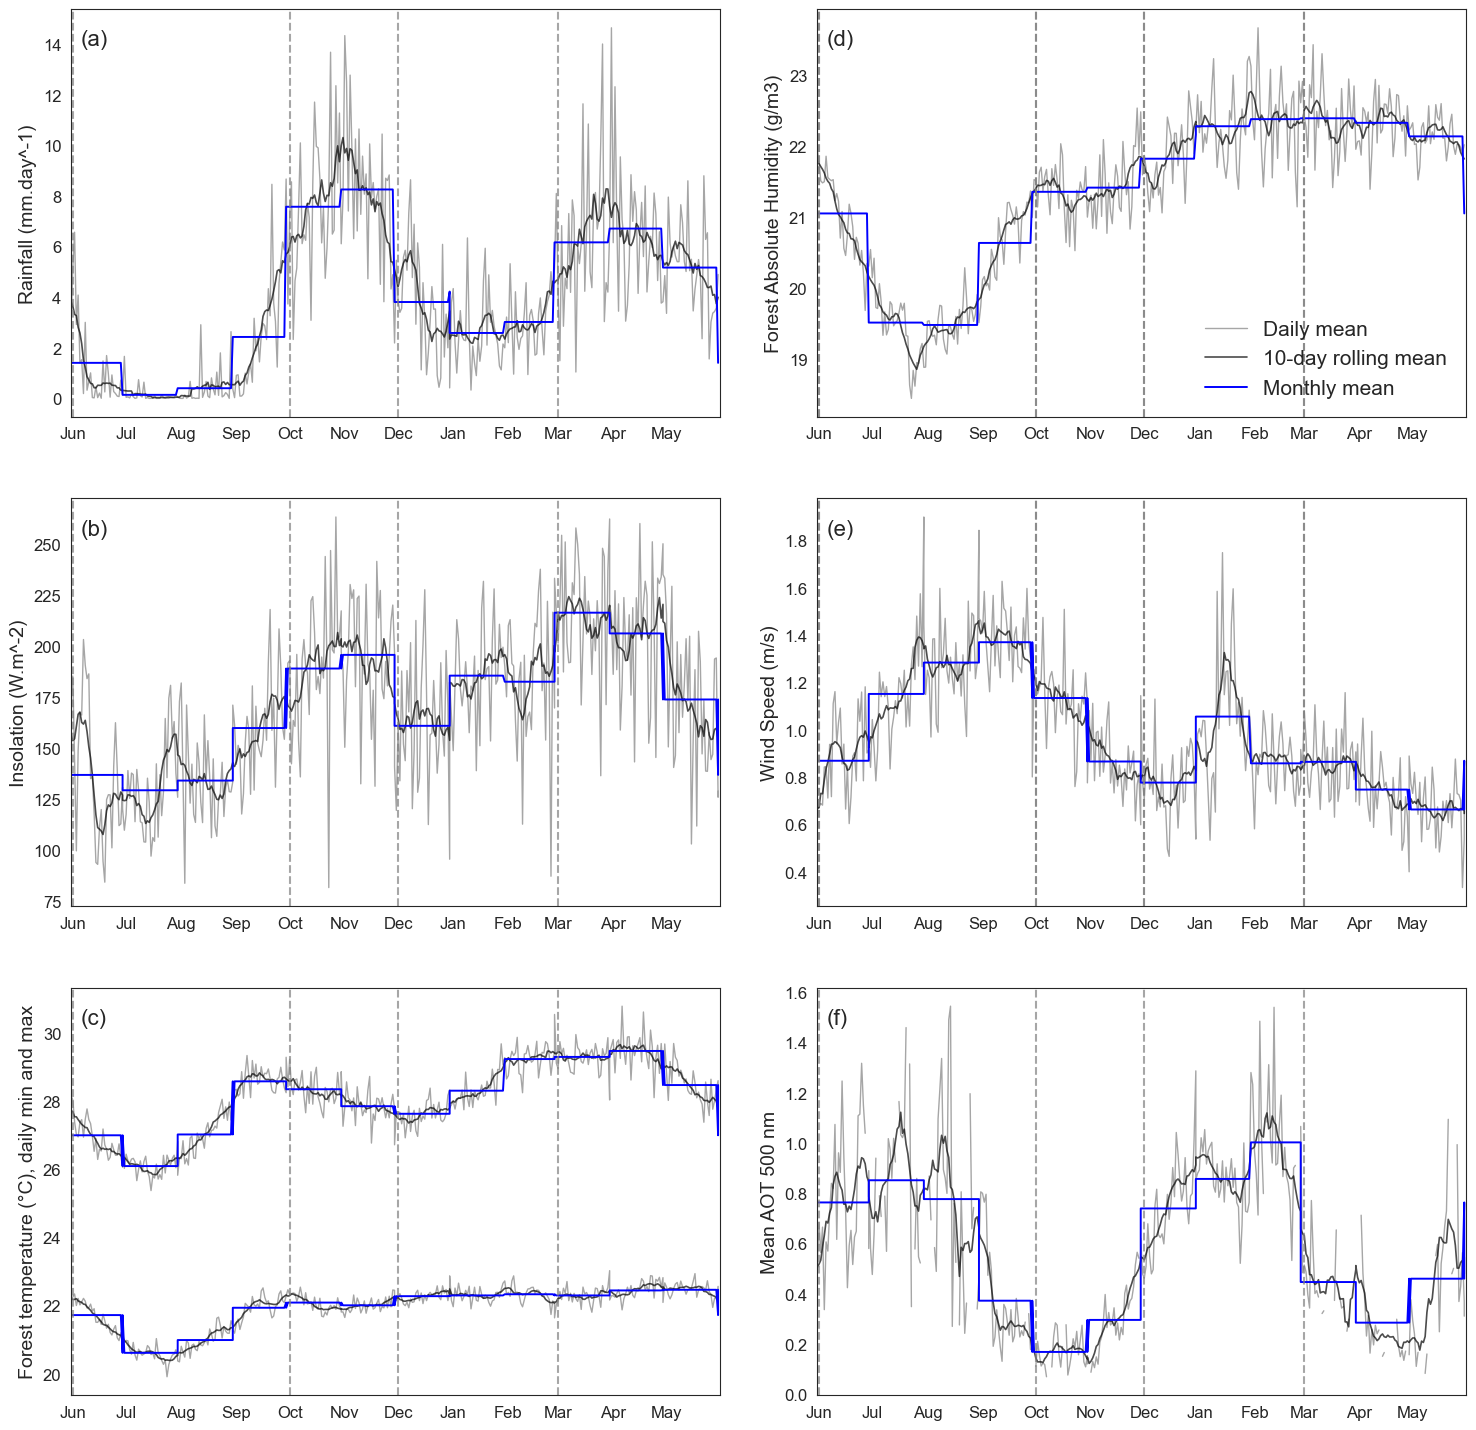

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sensor_colors = plotf.get_color_maps()['sensor']
season_colors = plotf.get_color_maps()['season']

# --- Set up figure with 4 vertical panels ---
fig = plt.figure(figsize=(18, 18))
gs = fig.add_gridspec(3, 2, hspace=0.2, wspace = 0.15)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[0, 1], sharex=ax1)
ax5 = fig.add_subplot(gs[1, 1], sharex=ax1)
ax6 = fig.add_subplot(gs[2, 1], sharex=ax1)

rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 18,    # slightly larger
    'xtick.labelsize': 13,   # easier to read
    'ytick.labelsize': 13,
    'legend.fontsize': 15
})


# --- Panel 1: Climate (e.g., Rainfall) ---

# Climate plotting directly
df_sorted = Rainfall_DOY.sort_values('WaterYearDOY')

for col, label in {
    'MeanRain_mm':'Daily mean',
    'MeanRain_10day_mm':'10-day rolling mean',
    'MeanRain_month_mm':'Monthly mean'
}.items():
    ax1.plot(df_sorted['WaterYearDOY'], df_sorted[col], label=label,
             color={'MeanRain_mm':'gray', 'MeanRain_10day_mm':'black','MeanRain_month_mm':'blue'}[col],
             alpha={ 'MeanRain_mm':0.7,'MeanRain_10day_mm':0.7,'MeanRain_month_mm':1}[col],
             linewidth={ 'MeanRain_mm':1,'MeanRain_10day_mm':1.2,'MeanRain_month_mm':1.4}[col])

ax1.set_xlim(0, 365)
ax1.set_ylabel('Rainfall (mm.day^-1)')
# ax4.set_xlabel('Water Year (June → May)')
# ax4.set_title('Seasonal Rainfall')
# ax1.legend(frameon = False, loc = 'upper right')

# --- Panel 2: Climate (Solar)
df_sorted = Solar_DOY.sort_values('WaterYearDOY')

for col, label in {
    'Solar_Wm2':'Daily mean',
    'Solar_Wm2_10days':'10-day rolling mean',
    'Solar_Wm2_month':'Monthly mean'
}.items():
    ax2.plot(df_sorted['WaterYearDOY'], df_sorted[col], label=label,
             color={'Solar_Wm2':'gray', 'Solar_Wm2_10days':'black','Solar_Wm2_month':'blue'}[col],
             alpha={ 'Solar_Wm2':0.7,'Solar_Wm2_10days':0.7,'Solar_Wm2_month':1}[col],
             linewidth={ 'Solar_Wm2':1,'Solar_Wm2_10days':1.2,'Solar_Wm2_month':1.4}[col])
ax2.set_ylabel('Insolation (W.m^-2)')

# ax2.legend(frameon = False, loc = 'lower right')

# ---- temperature

df_sorted = Temp_forest_DOY.sort_values('WaterYearDOY')

df_sorted_min = df_sorted[Temp_forest_DOY['Type'] == 'Min']
df_sorted_max = df_sorted[Temp_forest_DOY['Type'] == 'Max']

for col, label in {
    'Temperature_c':'Daily mean',
    'Temperature_c_10days':'10-day rolling mean',
    'Temperature_c_month':'Monthly mean'
}.items():
    ax3.plot(df_sorted_min['WaterYearDOY'], df_sorted_min[col], label=label,
             color={'Temperature_c':'gray', 'Temperature_c_10days':'black','Temperature_c_month':'blue'}[col],
             alpha={ 'Temperature_c':0.7,'Temperature_c_10days':0.7,'Temperature_c_month':1}[col],
             linewidth={ 'Temperature_c':1,'Temperature_c_10days':1.2,'Temperature_c_month':1.4}[col])
    
    ax3.plot(df_sorted_max['WaterYearDOY'], df_sorted_max[col], label=label,
             color={'Temperature_c':'gray', 'Temperature_c_10days':'black','Temperature_c_month':'blue'}[col],
             alpha={ 'Temperature_c':0.7,'Temperature_c_10days':0.7,'Temperature_c_month':1}[col],
             linewidth={ 'Temperature_c':1,'Temperature_c_10days':1.2,'Temperature_c_month':1.4}[col])
ax3.set_ylabel('Forest temperature (°C), daily min and max')

# ax3.legend(frameon = False, loc = 'lower right')



# --- Panel 4: Humidity
df_sorted = Humidity_forest.sort_values('WaterYearDOY')

for col, label in {
    'AbsoluteHumidity_gm3':'Daily mean',
    'AbsoluteHumidity_gm3_10days':'10-day rolling mean',
    'AbsoluteHumidity_gm3_month':'Monthly mean'
}.items():
    ax4.plot(df_sorted['WaterYearDOY'], df_sorted[col], label=label,
             color={'AbsoluteHumidity_gm3':'gray', 'AbsoluteHumidity_gm3_10days':'black','AbsoluteHumidity_gm3_month':'blue'}[col],
             alpha={ 'AbsoluteHumidity_gm3':0.7,'AbsoluteHumidity_gm3_10days':0.7,'AbsoluteHumidity_gm3_month':1}[col],
             linewidth={ 'AbsoluteHumidity_gm3':1,'AbsoluteHumidity_gm3_10days':1.2,'AbsoluteHumidity_gm3_month':1.4}[col])
ax4.set_ylabel('Forest Absolute Humidity (g/m3)')

ax4.legend(frameon = False, loc = 'lower right')



# --- Panel 5: Wind
df_sorted = Wind_DOY.sort_values('WaterYearDOY')

for col, label in {
    'Wind_m_s':'Daily mean',
    'Wind_m_s_10days':'10-day rolling mean',
    'Wind_m_s_month':'Monthly mean'
}.items():
    ax5.plot(df_sorted['WaterYearDOY'], df_sorted[col], label=label,
             color={'Wind_m_s':'gray', 'Wind_m_s_10days':'black','Wind_m_s_month':'blue'}[col],
             alpha={ 'Wind_m_s':0.7,'Wind_m_s_10days':0.7,'Wind_m_s_month':1}[col],
             linewidth={ 'Wind_m_s':1,'Wind_m_s_10days':1.2,'Wind_m_s_month':1.4}[col])
ax5.set_ylabel('Wind Speed (m/s)')

# ax5.legend(frameon = False, loc = 'lower right')


# ---- Panel 5: Aerosol
df_sorted = Aerosol_DOY.sort_values('WaterYearDOY')

for col, label in {
    'MeanAOT_500':'Daily mean',
    'MeanAOT_500_10days':'10-day rolling mean',
    'MeanAOT_500_month':'Monthly mean'
}.items():
    ax6.plot(df_sorted['WaterYearDOY'], df_sorted[col], label=label,
             color={'MeanAOT_500':'gray', 'MeanAOT_500_10days':'black','MeanAOT_500_month':'blue'}[col],
             alpha={ 'MeanAOT_500':0.7,'MeanAOT_500_10days':0.7,'MeanAOT_500_month':1}[col],
             linewidth={ 'MeanAOT_500':1,'MeanAOT_500_10days':1.2,'MeanAOT_500_month':1.4}[col])
ax6.set_ylabel('Mean AOT 500 nm')

# ax6.legend(frameon = False, loc = 'lower right')




# Month ticks for water year

months = pd.date_range(df_sorted['Dayof2019'].min(), df_sorted['Dayof2019'].max(), freq='MS')
wy_ticks = ((months.dayofyear - 151) % 365)
month_labels = months.strftime('%b')  # or .str[0] for J F M...

ax1.set_xticks(wy_ticks)
ax1.set_xticklabels(month_labels)


for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
    ax.text(0.015, 0.95, f'({string.ascii_lowercase[i]})',
                transform=ax.transAxes,
                fontsize=16, va='top', ha='left')
    # Climate vertical lines
    for d in ['2025-06-01','2025-10-01','2025-12-01','2026-03-01']:
        doy = pd.to_datetime(d).dayofyear
        wy_doy = (doy - 151) % 365
        # ax4.axvspan(wy_doy, info['end'], color=season_colors[info['type']], alpha=0.05, zorder=0)
        ax.axvline(wy_doy, color='gray', linestyle='--', alpha=0.7)



# Climate vertical lines
for d in ['2025-06-01','2025-10-01','2025-12-01','2026-03-01']:
    doy = pd.to_datetime(d).dayofyear
    wy_doy = (doy - 151) % 365
    # ax4.axvspan(wy_doy, info['end'], color=season_colors[info['type']], alpha=0.05, zorder=0)
    ax4.axvline(wy_doy, color='gray', linestyle='--', alpha=0.7)
    ax5.axvline(wy_doy, color='gray', linestyle='--', alpha=0.7)





plt.tight_layout()
plt.savefig('../outputs/figures/plot_climate.png', dpi=600, bbox_inches='tight')

plt.show()



rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 14,    # slightly larger
    'xtick.labelsize': 12,   # easier to read
    'ytick.labelsize': 12,
    'legend.fontsize': 14
})
